___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [2]:
df = pd.read_csv('Frozen_Dessert_Production.csv')
df.head()

,DATE,IPN31152N
0,1972-01-01,59.962
1,1972-02-01,67.061
2,1972-03-01,74.235
3,1972-04-01,78.112
4,1972-05-01,84.764


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       573 non-null    object 
 1   IPN31152N  573 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [12]:
df = df.set_index('DATE').rename(columns={'IPN31152N':'Production'})
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


<AxesSubplot:xlabel='DATE'>

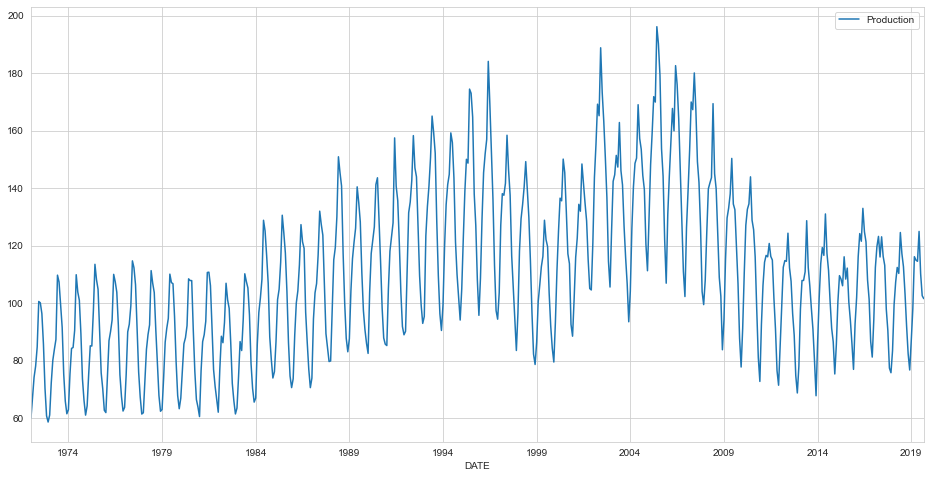

In [14]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [15]:
len(df)

573

In [16]:
test_percent = 0.15

In [17]:
len(df)*test_percent

85.95

In [18]:
test_size = np.round(len(df)*test_percent)
test_size

86.0

In [19]:
test_ind = int(len(df) - test_size)
test_ind

487

In [20]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [21]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2012-03-01,112.487
2012-04-01,114.811
2012-05-01,114.566


In [22]:
test

,Production
DATE,
2012-08-01,107.643
2012-09-01,96.370
2012-10-01,88.886
2012-11-01,74.838
2012-12-01,68.769
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


## Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

## Time Series Generator

In [24]:
scaler = MinMaxScaler()

In [25]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Modelling & Model Performance

## with "tanh" activation function

In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [28]:
len(generator)

475

In [29]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [30]:
X, y = generator[0]

In [31]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [33]:
train_scaled.shape

(487, 1)

In [34]:
n_features = train_scaled.shape[1]

In [35]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [39]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [40]:
len(validation_generator)

74

In [41]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
475/475 [==============================] - 18s 23ms/step - loss: 0.0257 - val_loss: 0.0029
Epoch 2/120
475/475 [==============================] - 8s 17ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 3/120
475/475 [==============================] - 8s 18ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 4/120
475/475 [==============================] - 8s 17ms/step - loss: 0.0047 - val_loss: 0.0025
Epoch 5/120
475/475 [==============================] - 9s 18ms/step - loss: 0.0043 - val_loss: 0.0028
Epoch 6/120
475/475 [==============================] - 8s 17ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 7/120
475/475 [==============================] - 8s 18ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 8/120
475/475 [==============================] - 9s 18ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 9/120
475/475 [==============================] - 8s 18ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 10/120
475/475 [==============================] - 8s 17ms/step - loss: 0.00

<AxesSubplot:>

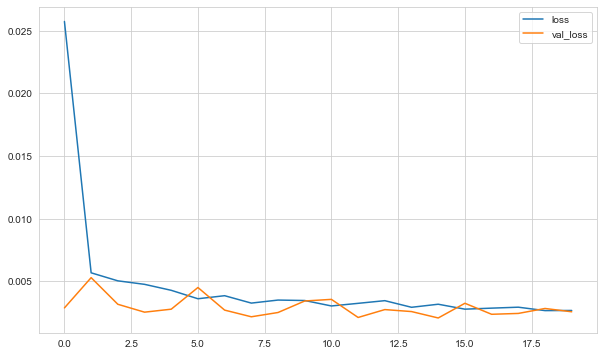

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [45]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 35ms/step


In [46]:
predictions_scaled

[array([0.3531283], dtype=float32),
 array([0.2715382], dtype=float32),
 array([0.20156172], dtype=float32),
 array([0.17748632], dtype=float32),
 array([0.21186328], dtype=float32),
 array([0.2748876], dtype=float32),
 array([0.33222336], dtype=float32),
 array([0.3769995], dtype=float32),
 array([0.4126789], dtype=float32),
 array([0.436368], dtype=float32),
 array([0.4371491], dtype=float32),
 array([0.40460676], dtype=float32)]

In [47]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.7012824681272027 
mae: 0.051466496332532786 
mse: 0.004573650731428847 
rmse: 0.06762877147656053


### Inverse Transformation and Comparing

In [48]:
predictions = scaler.inverse_transform(predictions_scaled)

In [55]:
len(test)

86

In [58]:
compare = test[:12]

In [59]:
compare['Predictions'] = predictions

In [60]:
compare

,Production,Predictions
DATE,,
2012-08-01,107.643,107.220
2012-09-01,96.370,96.000
2012-10-01,88.886,86.377
2012-11-01,74.838,83.067
2012-12-01,68.769,87.794
2013-01-01,78.118,96.461
2013-02-01,98.034,104.345
2013-03-01,107.884,110.502
2013-04-01,107.910,115.409


<AxesSubplot:xlabel='DATE'>

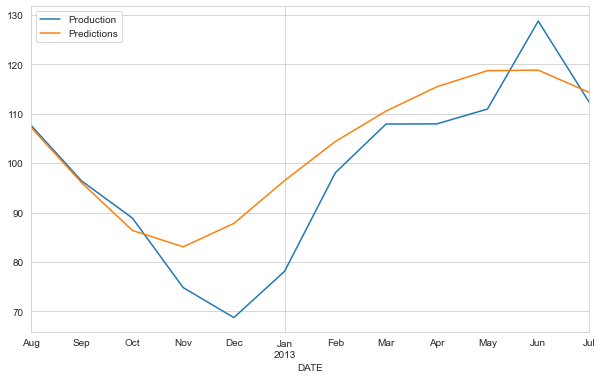

In [52]:
compare.plot()

In [61]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.7012824681272027 
mae: 7.077358630022281 
mse: 86.48806780467258 
rmse: 9.299896117950597


## with "relu" activation function

In [62]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [63]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [64]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [65]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
475/475 [==============================] - 12s 18ms/step - loss: 0.0267 - val_loss: 0.0113
Epoch 2/120
475/475 [==============================] - 7s 14ms/step - loss: 0.0109 - val_loss: 0.0040
Epoch 3/120
475/475 [==============================] - 8s 16ms/step - loss: 0.0086 - val_loss: 0.0053
Epoch 4/120
475/475 [==============================] - 7s 14ms/step - loss: 0.0072 - val_loss: 0.0044
Epoch 5/120
475/475 [==============================] - 7s 15ms/step - loss: 0.0059 - val_loss: 0.0027
Epoch 6/120
475/475 [==============================] - 7s 14ms/step - loss: 0.0061 - val_loss: 0.0075
Epoch 7/120
475/475 [==============================] - 8s 16ms/step - loss: 0.0056 - val_loss: 0.0033
Epoch 8/120
475/475 [==============================] - 7s 15ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 9/120
475/475 [==============================] - 7s 15ms/step - loss: 0.0042 - val_loss: 0.0027
Epoch 10/120
475/475 [==============================] - 7s 15ms/step - loss: 0.00

<AxesSubplot:>

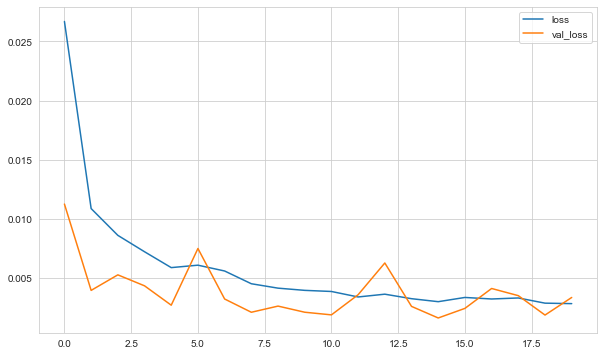

In [66]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [67]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 61ms/step


In [68]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.9145651798346308 
mae: 0.031246895194591336 
mse: 0.0013080886993443207 
rmse: 0.03616750889049895


### Inverse Transformation and Comparing

In [69]:
predictions = scaler.inverse_transform(predictions_scaled)

In [70]:
compare = test[:12]

In [71]:
compare['Predictions'] = predictions

<AxesSubplot:xlabel='DATE'>

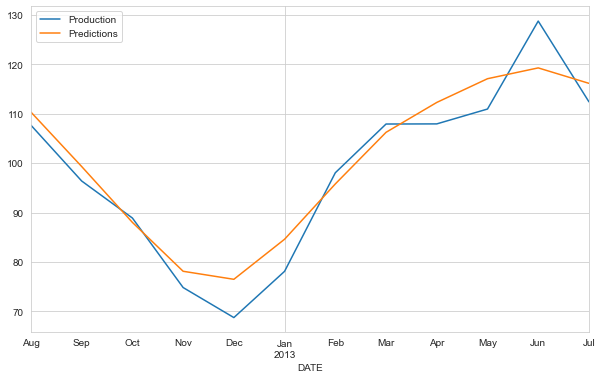

In [72]:
compare.plot()

In [73]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.9145651798346308 
mae: 4.2968824210995145 
mse: 24.736052393767626 
rmse: 4.973535200817184


# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [74]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [75]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [76]:
len(df)

573

In [77]:
len(generator)

561

In [78]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=20)

Epoch 1/20
561/561 [==============================] - 12s 13ms/step - loss: 0.0274
Epoch 2/20
561/561 [==============================] - 8s 14ms/step - loss: 0.0095
Epoch 3/20
561/561 [==============================] - 8s 14ms/step - loss: 0.0072
Epoch 4/20
561/561 [==============================] - 8s 14ms/step - loss: 0.0064
Epoch 5/20
561/561 [==============================] - 8s 13ms/step - loss: 0.0061
Epoch 6/20
561/561 [==============================] - 8s 14ms/step - loss: 0.0055
Epoch 7/20
561/561 [==============================] - 8s 14ms/step - loss: 0.0054
Epoch 8/20
561/561 [==============================] - 8s 15ms/step - loss: 0.0047
Epoch 9/20
561/561 [==============================] - 8s 14ms/step - loss: 0.0048
Epoch 10/20
561/561 [==============================] - 8s 14ms/step - loss: 0.0037
Epoch 11/20
561/561 [==============================] - 8s 14ms/step - loss: 0.0035
Epoch 12/20
561/561 [==============================] - 8s 15ms/step - loss: 0.0033
Epoch 13/20


In [79]:
scaled_full_data.shape

(573, 1)

In [80]:
scaled_full_data[-length:].shape

(12, 1)

In [81]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 52ms/step


In [82]:
forecast = scaler.inverse_transform(forecast)

In [83]:
forecast

array([[ 85.30822985],
       [ 78.25076016],
       [ 77.62116493],
       [ 85.34795198],
       [ 95.92771409],
       [104.48632576],
       [109.12163286],
       [112.02767799],
       [112.99598813],
       [107.51478924],
       [ 99.31597789],
       [ 89.84425928]])

In [84]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [85]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [86]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [87]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [88]:
forecast_df

,Forecast
2019-10-01,85.308
2019-11-01,78.251
2019-12-01,77.621
2020-01-01,85.348
2020-02-01,95.928
2020-03-01,104.486
2020-04-01,109.122
2020-05-01,112.028
2020-06-01,112.996
2020-07-01,107.515


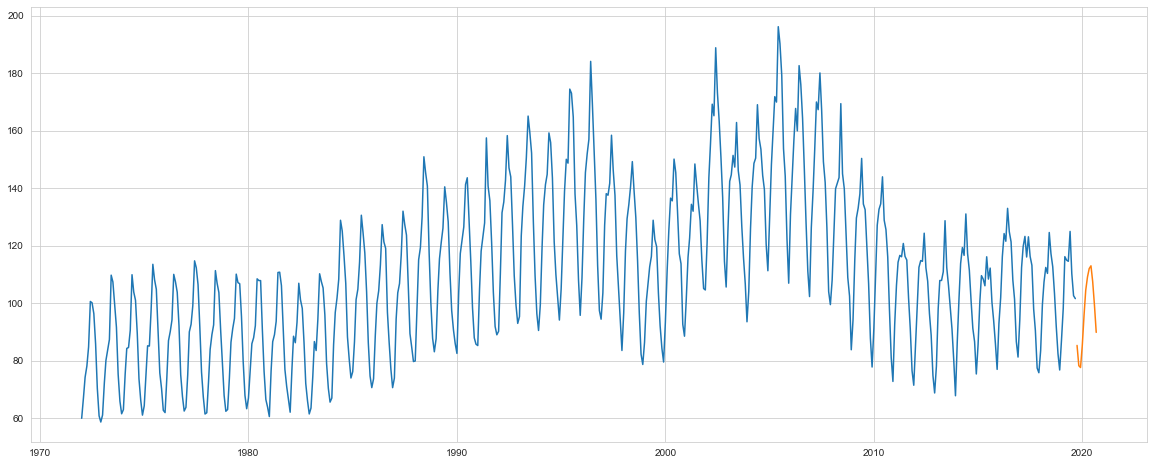

In [90]:
plt.figure(figsize = (20, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

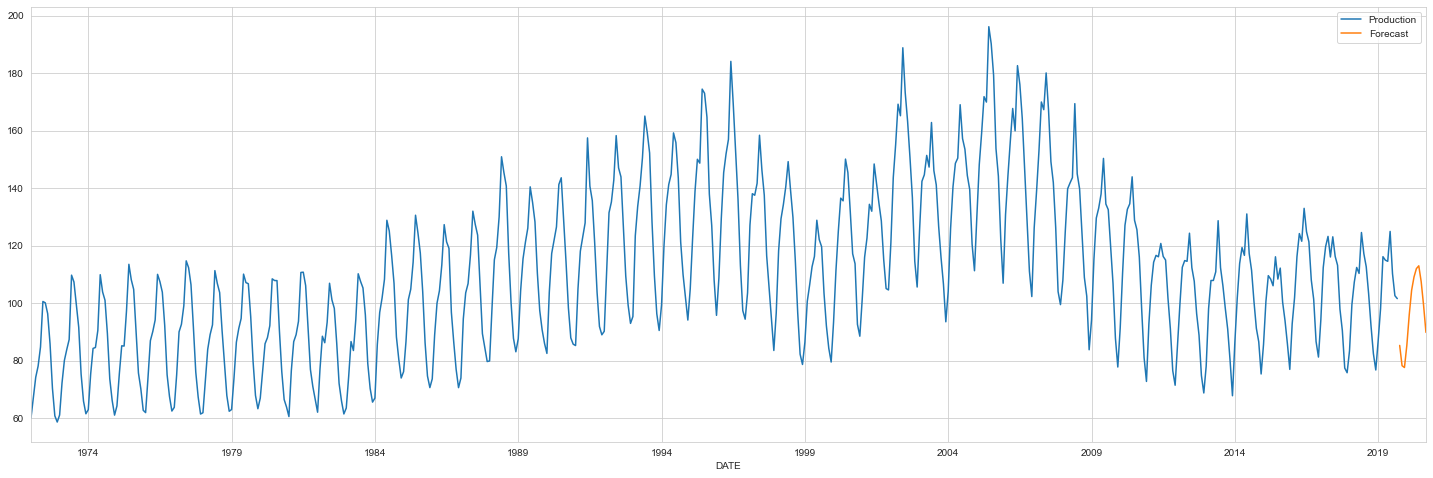

In [91]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (25, 8));

(576.0, 611.0)

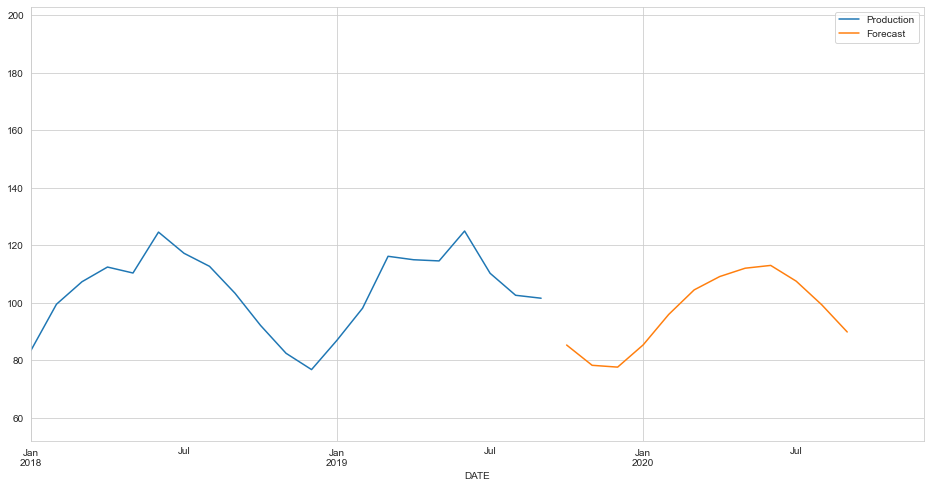

In [92]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

In [93]:
dataset_total = pd.concat((df['Production'], forecast_df['Forecast']), axis=0)

<AxesSubplot:>

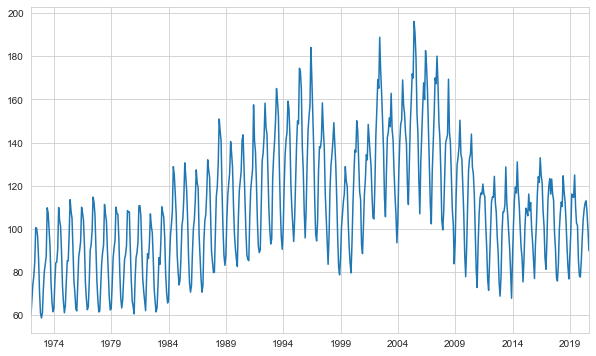

In [94]:
dataset_total.plot()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___